# **Analysis 1: Police Department Investigated Hate Crimes Dataset**

## **Data Assembly**

For the first part of the analysis, I used the Police Department Investigated Hate Crimes dataset from DataSF. This dataset includes hate crime incidents reported by the San Francisco Police Department (SFPD) to the California Department of Justice. It contains 1,764 rows and 23 columns, where each row represents a single reported hate crime.
Since DataSF’s API only allows access to 1,000 rows at a time, I downloaded the full dataset as a CSV file to ensure all data is captured. Using the API would have resulted in missing data, which could have affected the accuracy of the analysis.

**`DataSF - Open Data Portal. Police Department investigated hate crimes.`** https://data.sfgov.org/Public-Safety/Police-Department-Investigated-Hate-Crimes/huqr-9p9x/about_data

## **Importing the Dataset**

To start working with the data, I used pandas to load the CSV file into a DataFrame, making it easier to clean and analyze. Below is the code that imports the necessary libraries and reads the dataset into a structured format:


In [1]:
import pandas as pd  # Import pandas library
import matplotlib.pyplot as plt  # Import matplotlib for visualization

# Load the CSV file into a DataFrame from the URL
url = "https://raw.githubusercontent.com/jcsibajam/projects/refs/heads/main/SF_Investigated_Hate_Crimes.csv"
df = pd.read_csv(url)


## **Understanding the Dataset**

To get a better understanding of the dataset, I first printed the column names to see what kind of information was available. I also reviewed the dataset documentation from DataSF to understand how each variable is defined. This step helped me identify the most relevant columns for my analysis.

The dataset includes a wide range of details about each hate crime, but I focused on the following key variables:



*   **occurence_month:** The year and month when the hate crime was reported. This helps track trends over time.
*   **total_number_of_individual_victims:** The number of people affected by the crime, giving insight into the scale of each incident.
*   **most_serious_bias_type**: The broader category of bias (e.g., racial, religious, or LGBTQ+ discrimination), revealing overall patterns in hate crimes.
*   **most_serious_bias:** The specific reason behind the hate crime, such as race, religion, or sexual orientation, showing who is being targeted.
*   **most_serious_location:** The place where the most severe offense occurred, helping to identify high-risk locations in the city.

To confirm that these columns were present in the dataset, I ran the following code to display all column names:

In [2]:
# Display column names
print("\nColumn Names:")
print(df.columns)


Column Names:
Index(['record_id', 'occurence_month', 'ncic', 'total_number_of_victims',
       'total_number_of_individual_victims', 'suspects_race_as_a_group',
       'total_number_of_suspects', 'most_serious_ucr', 'most_serious_ucr_type',
       'most_serious_location', 'most_serious_bias', 'most_serious_bias_type',
       'most_serious_victim_type', 'weapon_type', 'offensive_act',
       'is_multiple_bias', 'total_number_of_individual_victims_adult',
       'total_number_of_individual_victims_juvenile',
       'total_number_of_suspects_adult', 'total_number_of_suspects_juvenile',
       'suspects_ethnicity_as_a_group', 'data_as_of', 'data_loaded_at'],
      dtype='object')


## **Analyzing the Dataset**

Now that I have a clearer understanding of the dataset, I wanted to explore how the number of hate crime victims has changed over the years. To do this, I grouped the data by year and summed up the total number of victims for each year.

**Extracting the year from the 'occurence_month' column**

The dataset contains a column called 'occurence_month', which includes the date of each reported hate crime.

First, I converted this column into a datetime format so Python could recognize it as a date.

Next, I created a new column called 'occurence_year' by extracting the year from 'occurence_month'.

I also removed any rows where the date conversion failed (to avoid errors in the analysis).

In [3]:
# Extract the year from 'occurence_month' and create a new column 'occurence_year'
df['occurence_month'] = pd.to_datetime(df['occurence_month'], errors='coerce')

# Drop any rows where 'occurence_month' is NaT (failed conversion)
df = df.dropna(subset=['occurence_month'])

df['occurence_year'] = df['occurence_month'].dt.year

# Filter data for years 2020-2024
df = df[df['occurence_year'].isin([2020, 2021, 2022, 2023, 2024])]

## **Grouping 'total_number_of_individual_victims' Per Year**

I grouped the data by year **'occurence_year'** and summed up the number of victims **'total_number_of_individual_victims'**.

This step helps reveal the total number of people affected by hate crimes in each year.

Finally, I created a bar chart to make it easier to see how the number of hate crime victims changed over time.

occurence_year
2020    54
2021    96
2022    38
2023    66
2024    44
Name: total_number_of_individual_victims, dtype: int64


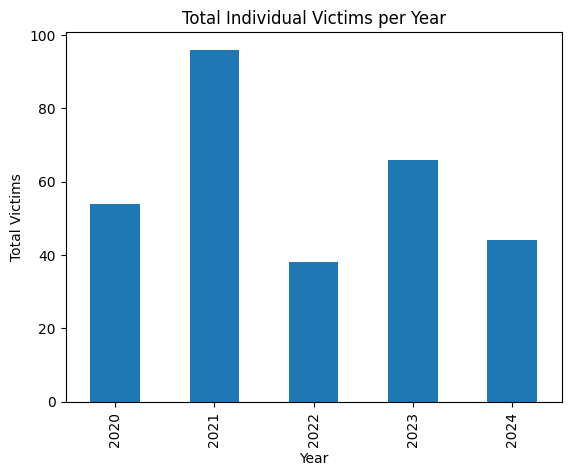

In [4]:
# Group by 'occurence_year' and 'total_number_of_individual_victims'
group1 = df.groupby('occurence_year')['total_number_of_individual_victims'].sum()
print(group1)
group1.plot(kind='bar', title='Total Individual Victims per Year')
plt.xlabel('Year')
plt.ylabel('Total Victims')
plt.show()

## **Interpreting the Results**


*   **2021** had the **highest number of hate crime victims** (96), showing a significant spike.
*   2022 had the lowest number (38 victims), followed by a slight increase in 2023 (66 victims).
*   2020 and 2024 had similar victim counts (54 and 44 victims, respectively).

These results give us a big-picture view, but they raise the question:

***Which groups were most affected in each year?*** (e.g., race, sexual orientation, religion)

This brings us to the next part of the analysis: exploring trends based on different bias types.

## **Grouping 'total_number_of_individual_victims' by 'most_serious_bias_type'**

After analyzing the total number of hate crime victims per year, I wanted to take a closer look at who is being targeted the most and how these patterns have changed over time. To do this, I grouped the data by year and bias type using **'most_serious_bias_type'** and calculated the total number of victims in each category.

To make the trends easier to understand, I created a stacked bar chart that shows how different types of bias have contributed to hate crimes over the years. Each color in the chart represents a different bias type, allowing us to see which groups have been most affected in each year.

occurence_year  most_serious_bias_type 
2020            Gender Nonconforming        2
                Race/Ethnicity/Ancestry    39
                Religion                    4
                Sexual Orientation          9
2021            Gender Nonconforming        1
                Race/Ethnicity/Ancestry    75
                Religion                    3
                Sexual Orientation         17
2022            Gender                      2
                Gender Nonconforming        3
                Race/Ethnicity/Ancestry    19
                Religion                    7
                Sexual Orientation          7
2023            Gender Nonconforming        9
                Race/Ethnicity/Ancestry    32
                Religion                   13
                Sexual Orientation         12
2024            Disability                  3
                Gender Nonconforming        2
                Race/Ethnicity/Ancestry    19
                Religion                

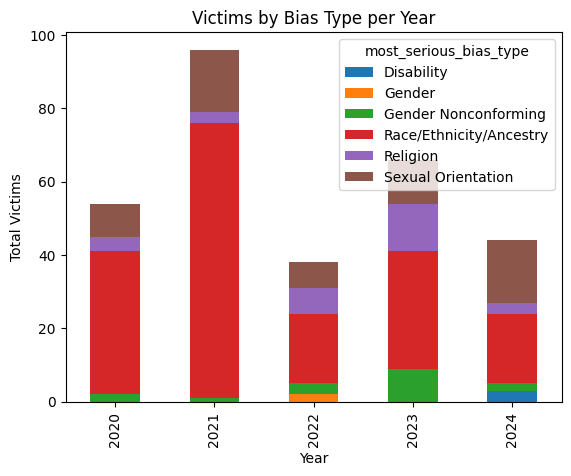

In [5]:
# Group by year and bias type, then sum total victims
group2 = df.groupby(['occurence_year', 'most_serious_bias_type'])['total_number_of_individual_victims'].sum()
print(group2)  # Print results to check the numbers

# Create a stacked bar chart to visualize bias trends
group2.unstack().plot(kind='bar', stacked=True, title='Victims by Bias Type per Year')
plt.xlabel('Year')
plt.ylabel('Total Victims')
plt.show()

## **Interpreting the results**

*   **Race/Ethnicity/Ancestry bias** (red) is the most frequently reported hate crime category every year.
*   **2021** had the highest number of victims overall, with a **sharp increase in racial bias crimes.**
*   Hate crimes based on **sexual orientation** (brown) **occur consistently** each year, showing an ongoing risk for LGBTQ+ individuals.
*   Gender and gender nonconforming bias crimes appear every year but in smaller numbers compared to other categories.

These results help reveal which communities have been most affected by hate crimes over time and highlights any emerging trends in bias-related incidents.

Based on the previous results, the two most common bias types are Race/Ethnicity/Ancestry and Sexual Orientation. In the next part of the analysis, I will focus on these categories to better understand their trends over time.

## **Grouping 'total_number_of_individual_victims' by 'most_serious_bias_type' = 'Race/Ethnicity/Ancestry' and 'most_serious_bias'**

In this section, I take a closer look at the specific racial and ethnic groups most affected by hate crimes over time. So far, we’ve seen that Race/Ethnicity/Ancestry is the most common bias type in reported hate crimes. Now, I want to dig deeper and see which racial or ethnic communities have been targeted the most during the study period (2020-2024).

**Filtering the Dataset for Race/Ethnicity Bias:** Since I only want to analyze hate crimes based on race and ethnicity, I filtered the dataset to include only rows where 'most_serious_bias_type' is 'Race/Ethnicity/Ancestry'.

**Grouping by Year and Specific Bias Type:** Within this filtered dataset, I grouped the data by year 'occurence_year' and the specific racial/ethnic group targeted 'most_serious_bias'.

**Creating a Stacked Bar Chart:** The .unstack() function reshapes the data so that each racial/ethnic group becomes a separate category on the chart. The stacked bar chart makes it easy to see which groups experienced the highest number of hate crimes each year.

occurence_year  most_serious_bias                 
2020            Anti-Arab                              1
                Anti-Asian                             9
                Anti-Black or African American        11
                Anti-Citizenship Status                1
                Anti-Hispanic or Latino               10
                Anti-Other Race/Ethnicity/Ancestry     2
                Anti-White                             5
2021            Anti-Asian                            46
                Anti-Black or African American        15
                Anti-Hispanic or Latino                6
                Anti-Multiple Races (Group)            0
                Anti-Other Race/Ethnicity/Ancestry     6
                Anti-White                             2
2022            Anti-Arab                              1
                Anti-Asian                             9
                Anti-Black or African American         5
                Anti-Hispanic or Lati

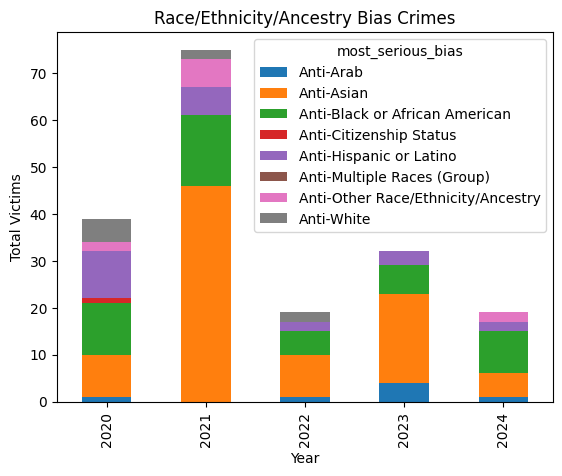

In [6]:
# Group by 'occurence_year', 'most_serious_bias_type' = 'Race/Ethnicity/Ancestry', 'most_serious_bias'
race_ethnicity_df = df[df['most_serious_bias_type'] == 'Race/Ethnicity/Ancestry'] # Filter the dataset to include only race/ethnicity-related hate crimes
group3 = race_ethnicity_df.groupby(['occurence_year', 'most_serious_bias'])['total_number_of_individual_victims'].sum()
print(group3)
group3.unstack().plot(kind='bar', stacked=True, title='Race/Ethnicity/Ancestry Bias Crimes')
plt.xlabel('Year')
plt.ylabel('Total Victims')
plt.show()

## **Interpreting the results**

*   2021 had the highest number of Race/Ethnicity-Based hate crimes.
*   Anti-Asian hate crimes peaked in 2021 with 46 victims, the highest recorded for any group in a single year.
*   Black or African American individuals were targeted each year, with numbers ranging from 6 to 15 victims per year.
*   Hate crimes against Hispanic or Latino individuals appear every year but at lower rates than Anti-Asian or Anti-Black crimes. This pattern indicates that while Anti-Hispanic hate crimes exist, they haven't seen the same dramatic spikes as other groups.


## **Grouping 'total_number_of_individual_victims' by 'most_serious_bias_type' = 'Sexual Orientation' and 'most_serious_bias'**

So far, we’ve seen that 'Sexual Orientation' is the second most common bias type in reported hate crimes. Now, let’s take a closer look at who within the LGBTQ+ community has been most affected and how these patterns have changed over time.

To do this, I grouped the data by year and specific bias within the Sexual Orientation category, then summed up the total number of victims in each group.

This analysis follows the same structure I took to look into Race/Ethnicity-Based Hate Crimes.

occurence_year  most_serious_bias                                     
2020            Anti-Gay (Male)                                            5
                Anti-Lesbian                                               3
                Anti-Lesbian/Gay/Bisexual or Transgender (Mixed Group)     1
2021            Anti-Gay (Male)                                           17
2022            Anti-Gay (Male)                                            6
                Anti-Lesbian/Gay/Bisexual/Transgender                      1
2023            Anti-Gay (Male)                                            6
                Anti-Lesbian                                               2
                Anti-Lesbian/Gay/Bisexual/Transgender                      4
2024            Anti-Gay (Male)                                           13
                Anti-Lesbian/Gay/Bisexual/Transgender                      4
Name: total_number_of_individual_victims, dtype: int64


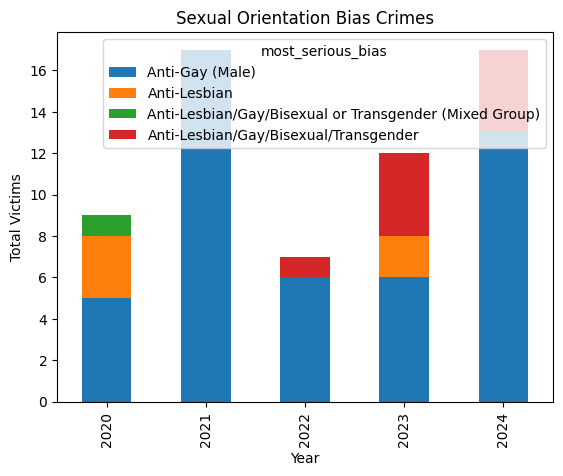

In [7]:
# Group by 'occurence_year', 'most_serious_bias_type' = 'Sexual Orientation', 'most_serious_bias'
sexual_orientation_df = df[df['most_serious_bias_type'] == 'Sexual Orientation']
group4 = sexual_orientation_df.groupby(['occurence_year', 'most_serious_bias'])['total_number_of_individual_victims'].sum()
print(group4)
group4.unstack().plot(kind='bar', stacked=True, title='Sexual Orientation Bias Crimes')
plt.xlabel('Year')
plt.ylabel('Total Victims')
plt.show()

## **Interpreting the results**

*   Similar to race hate crimes, 2021 saw the highest number of sexual orientation bias crimes.
*   Anti-Gay (Male) hate crimes are the most frequently reported cases across all years. The highest recorded number was 17 victims in 2021, followed by 13 victims in 2024.
*  This suggests that homophobia remains a persistent issue, making gay men the most at-risk group within sexual orientation bias crimes
*   Anti-Lesbian hate crimes are reported every year, but in much smaller numbers compared to Anti-Gay (Male) cases. The highest recorded number was 3 victims in 2020, with fewer cases in later years. This could indicate underreporting of hate crimes against lesbians.


## **Grouping 'total_number_of_individual_victims' by 'most_serious_bias' = 'Anti-Asian' and 'most_serious_location'**

Now that we know Asian and Gay (Male) are the most at-risk groups, the final step of this dataset analysis is to understand where these crimes are happening. Knowing the locations of these incidents can help identify high-risk areas and provide insights into whether certain public or private spaces are more dangerous.

To do this, I analyzed the dataset by grouping hate crime incidents based on location (**'most_serious_location'**).

*   **Filtering the Data for Anti-Asian Hate Crimes:** Since I only want to analyze hate crimes against Asian individuals, I first filtered the dataset to include only rows where 'most_serious_bias' is 'Anti-Asian'.
*   **Grouping by Year and Location:** Within the filtered dataset, I grouped the data by year ('occurence_year') and crime location ('most_serious_location').
*   Then, I summed up the total number of victims for each location per year.
*   **Creating a Stacked Bar Chart:** The .unstack() function restructures the data so that each location appears as a separate category in the chart.


occurence_year  most_serious_location        
2020            Air/Bus/Train Terminal            3
                Highway/Road/Alley/Street         6
2021            Air/Bus/Train Terminal            1
                Commercial/Office Building        1
                Convenience Store                 0
                Government/Public Building        1
                Highway/Road/Alley/Street        34
                Residence/Home/Driveway           3
                Restaurant                        3
                Shopping Mall                     1
                Specialty Store (TV/Fur/etc.)     2
2022            Bar/Night Club                    1
                Highway/Road/Alley/Street         3
                Residence/Home/Driveway           5
2023            Air/Bus/Train Terminal            2
                Highway/Road/Alley/Street        12
                Hotel/Motel/etc.                  1
                Other/Unknown                     1
                Pa

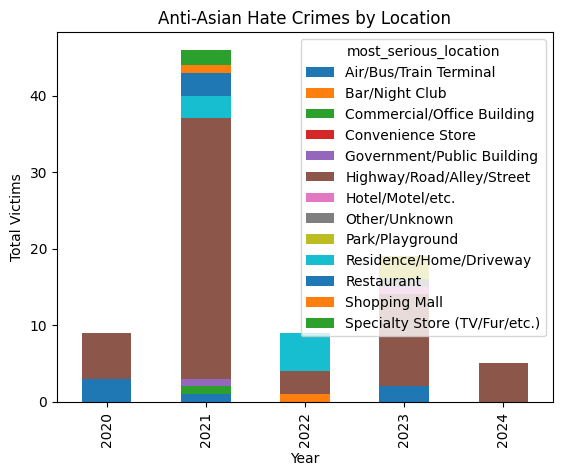

In [8]:
# Group by 'occurence_year', 'most_serious_bias_type' = 'Race/Ethnicity/Ancestry', 'most_serious_bias' = 'Anti-Asian', 'most_serious_location'
antiasian_df = race_ethnicity_df[race_ethnicity_df['most_serious_bias'] == 'Anti-Asian']
group5 = antiasian_df.groupby(['occurence_year', 'most_serious_location'])['total_number_of_individual_victims'].sum()
print(group5)
group5.unstack().plot(kind='bar', stacked=True, title='Anti-Asian Hate Crimes by Location')
plt.xlabel('Year')
plt.ylabel('Total Victims')
plt.show()

## **Interpreting the results**

*   The most common location for Anti-Asian Hate Crimes Is **Public Streets**.
Highway/Road/Alley/Street is the most frequent location for Anti-Asian hate crimes in nearly every year.
*   **2021 had the highest spike**, with 34 reported victims in public streets.
*   Public Transportation hubs are another high-risk area. Air/Bus/Train Terminals appear as a recurring crime location in 2020, 2021, and 2023.
*   Across all location types, 2021 had the highest number of victims, matching the previous analysis showing that 2021 had the worst overall spike in hate crimes against Asian individuals.


## **Grouping 'total_number_of_individual_victims' by 'most_serious_bias' = 'Anti-Gay (Male)' and 'most_serious_location'**

After analyzing the locations of Anti-Asian hate crimes, I used the same approach to explore where Anti-Gay (Male) hate crimes occurred. Understanding the locations of these incidents helps identify high-risk areas and whether Gay Male individuals face more danger in public spaces, businesses, nightlife areas, or residential locations.


occurence_year  most_serious_location      
2020            Bar/Night Club                  1
                Highway/Road/Alley/Street       3
                Residence/Home/Driveway         1
2021            Bar/Night Club                  1
                Commercial/Office Building      2
                Highway/Road/Alley/Street      10
                Park/Playground                 2
                Residence/Home/Driveway         1
                School-Elementary/Secondary     1
2022            Highway/Road/Alley/Street       5
                Parking Lot/Garage              1
2023            Bar/Night Club                  2
                Highway/Road/Alley/Street       2
                Residence/Home/Driveway         2
2024            Grocery/Supermarket             1
                Highway/Road/Alley/Street      10
                Other/Unknown                   1
                Parking Lot/Garage              1
Name: total_number_of_individual_victims, dtype: int64


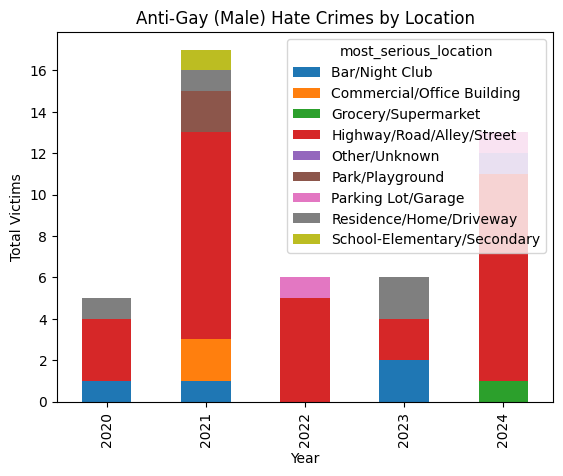

In [9]:
# Group by 'occurence_year', 'most_serious_bias_type' = 'Sexual Orientation', 'most_serious_bias' = 'Anti-Gay (Male)', 'most_serious_location'
antigay_df = sexual_orientation_df[sexual_orientation_df['most_serious_bias'] == 'Anti-Gay (Male)']
group6 = antigay_df.groupby(['occurence_year', 'most_serious_location'])['total_number_of_individual_victims'].sum()
print(group6)
group6.unstack().plot(kind='bar', stacked=True, title='Anti-Gay (Male) Hate Crimes by Location')
plt.xlabel('Year')
plt.ylabel('Total Victims')
plt.show()

## **Interpreting the results**

*   Public streets and highways (Highway/Road/Alley/Street) are the most common locations for attacks for gay males.
*   This suggests that many Anti-Gay (Male) hate crimes happen in public spaces, possibly as street harassment, physical assaults, or verbal abuse.
*   Bars and nightclubs appear in multiple years, including 2020, 2021, 2022, and 2023. Some of these incidents may involve altercations inside venues, while others might be attacks that happen near these locations when individuals are leaving at night.


## **Conclusion**

This part of the research explored hate crime patterns in San Francisco from 2020 to 2024, focusing on how race, sexual orientation, and location intersect to determine who is most at risk. By analyzing open data from the San Francisco Police Department, I was able to identify key trends in victim demographics, crime locations, and the years with the highest incidents.

### **Key Takeaways**

**2021 was the worst year for hate crimes**
*   The total number of victims peaked at 96 in 2021, significantly higher than any other year.
*   This trend was seen across both race-based and sexual orientation-based hate crimes.

**Race-based hate crimes are the most common**
*   Hate crimes related to Race/Ethnicity/Ancestry were the most frequently reported type each year.
*   Asian individuals faced the highest number of targeted hate crimes, with a dramatic spike in 2021.

**Sexual orientation-based hate crimes happen every year**
*   Hate crimes based on sexual orientation occur consistently every year, showing that LGBTQ+ individuals remain at risk in San Francisco.
*   Gay men are the most frequently targeted group, with 17 victims in 2021 and 13 victims in 2024.
*   Anti-Lesbian crimes are reported less often, but this could indicate underreporting rather than lower actual incidents.

**Location plays an important role in risk levels**
*   Public streets and transit areas are the most dangerous places for both Anti-Asian and Anti-Gay (Male) hate crimes.

From this analysis, we can conclude that the highest risk group for hate crimes in San Francisco is: **Asian individuals and gay men in public spaces**, particularly streets, transit hubs, and nightlife areas.

This intersection of identity (race, sexual orientation) and location determines who is most at risk and where they are most likely to experience hate crimes.


## **Next Steps**

While this study provides valuable insights, there are several ways to expand the research and generate more actionable findings:

**Ongoing monitoring of hate crime trends**
*   This analysis only covers 2020-2024 but hate crime patterns can shift over time.
*   A long-term analysis would help determine if certain years consistently see spikes in violence.

**Mapping high-risk areas**
*   Visualizing these locations on a geographical heat map could help identify neighborhoods and specific intersections with the most hate crimes.
*   Comparing these hate crime locations to general crime rates could reveal whether these areas already have high levels of violence.

**Investigating underreporting**
*   LGBTQ+ hate crimes, especially those targeting lesbians, are reported at much lower rates.
*   A deeper investigation into barriers to reporting (such as fear of retaliation or lack of police trust) would provide a clearer picture of the true scope of the problem.

**Exploring links between social/political events and hate crime surges**
*   2021 saw the highest number of hate crime victims. Were there specific political or social events that contributed to this increase? Looking at media coverage, protests, policy changes, or shifts in public sentiment could help explain these patterns.